# HT

## Brest Cancer Dataset

In [2]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

In [3]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

X, y = load_breast_cancer(return_X_y= True)
print ('X.shape= ', X.shape)
print ('y.shape= ', y.shape)

X.shape=  (569, 30)
y.shape=  (569,)


In [4]:
# YOUR_CODE.  Preproces data, train classifier and evaluate the perfromance on train and test sets 
# START_CODE 

cancer = load_breast_cancer()
X, y, labels, features = cancer.data, cancer.target, cancer.target_names, cancer.feature_names

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf= MLPClassifier(
    verbose= True,
    random_state=0,
    alpha= 10
)
clf.fit(X_train, y_train)

print("train accuracy= {:.3%}".format(clf.score (X_train, y_train)))
print("test accuracy= {:.3%}".format(clf.score (X_test, y_test)))
# END_CODE

Iteration 1, loss = 22.22712804
Iteration 2, loss = 8.14345725
Iteration 3, loss = 6.53877911
Iteration 4, loss = 6.71272102
Iteration 5, loss = 2.47137355
Iteration 6, loss = 4.01430511
Iteration 7, loss = 3.67130293
Iteration 8, loss = 1.90973428
Iteration 9, loss = 2.66056790
Iteration 10, loss = 2.66340361
Iteration 11, loss = 1.98334600
Iteration 12, loss = 1.91127814
Iteration 13, loss = 2.10482670
Iteration 14, loss = 1.77310927
Iteration 15, loss = 1.69636115
Iteration 16, loss = 1.73429822
Iteration 17, loss = 1.62969103
Iteration 18, loss = 1.56230294
Iteration 19, loss = 1.53401781
Iteration 20, loss = 1.50384610
Iteration 21, loss = 1.48082196
Iteration 22, loss = 1.43830938
Iteration 23, loss = 1.40310995
Iteration 24, loss = 1.37339711
Iteration 25, loss = 1.34089159
Iteration 26, loss = 1.32619470
Iteration 27, loss = 1.27843097
Iteration 28, loss = 1.28135266
Iteration 29, loss = 1.23783657
Iteration 30, loss = 1.19695612
Iteration 31, loss = 1.17974443
Iteration 32, lo

## Signs dataset

In [5]:
import h5py
import os
cwd= os.getcwd() # current working directory
path = os.path.join(cwd,'data') 

# signs data set (fingers)
def load_dataset():
    fn =  os.path.join(path , 'train_signs.h5')
    train_dataset = h5py.File(fn, "r")
    X_train = np.array(train_dataset["train_set_x"][:]) # your train set features
    y_train = np.array(train_dataset["train_set_y"][:]) # your train set labels

    fn =  os.path.join(path , 'test_signs.h5')
    test_dataset =  h5py.File(fn, "r")
    X_test = np.array(test_dataset["test_set_x"][:]) # your test set features
    y_test = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    y_train = y_train.reshape((1, y_train.shape[0]))
    y_test = y_test.reshape((1, y_test.shape[0]))
    
    return X_train, y_train, X_test, y_test, classes

In [6]:
X_train, y_train, X_test, y_test, classes = load_dataset()
y_train = y_train.ravel()
y_test = y_test.ravel()
print ('X_train.shape=', X_train.shape)
print ('X_test.shape=', X_test.shape)
print ('y_train.shape=', y_train.shape)
print ('y_test.shape=', y_test.shape)

X_train.shape= (1080, 64, 64, 3)
X_test.shape= (120, 64, 64, 3)
y_train.shape= (1080,)
y_test.shape= (120,)


In [7]:
def display_samples_in_grid(X, n_rows, n_cols= None, y = None ):
    if n_cols is None: 
        n_cols= n_rows
    indices = np.random.randint(0, len(X),n_rows*n_cols)
    for i in range (n_rows): 
        for j in range (n_cols):
            index = n_rows*i+j           
            ax = plt.subplot(n_rows,n_cols,index+1) 
            plt.imshow(X[indices[index]])
            if not (y is None):
                plt.title(y[indices[index]])
            plt.axis('off')

    plt.tight_layout(h_pad=1)

<IPython.core.display.Javascript object>


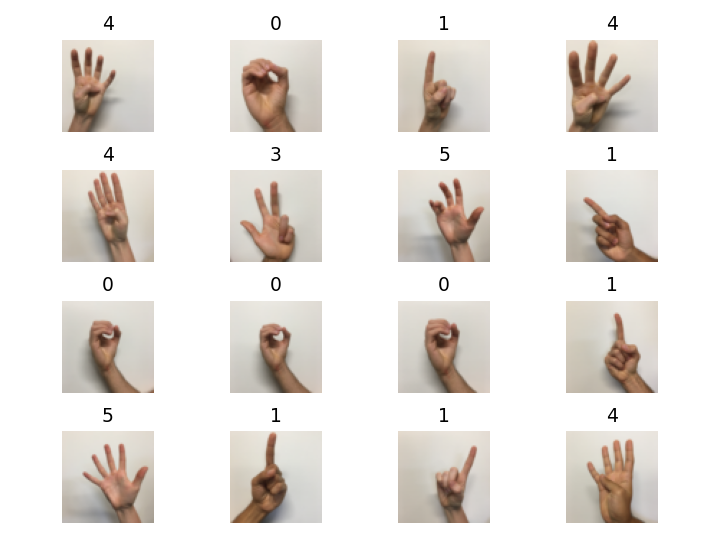

In [8]:
plt.figure()

display_samples_in_grid(X_train, n_rows=4, y= y_train)

In [9]:
plt.gcf().canvas.set_window_title('Train set')

C:\Users\Богдан\AppData\Local\Temp\ipykernel_7800\3540498473.py:1: MatplotlibDeprecationWarning: 
The set_window_title function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use `.FigureManagerBase.set_window_title` or GUI-specific methods instead.
  plt.gcf().canvas.set_window_title('Train set')


In [10]:
# Not in use 
def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)]
    return Y

In [14]:
# YOUR_CODE.  Preproces data
# START_CODE 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_reshaped = X_train.reshape(1080, 12288)
X_test_reshaped = X_test.reshape(120, 12288)

X_train_scaled = scaler.fit_transform(X_train_reshaped)
X_test_scaled = scaler.transform(X_test_reshaped)

# END_CODE     

print ("number of training examples = " + str(X_train_scaled.shape[1]))
print ("number of test examples = " + str(X_test_scaled.shape[1]))
print ("X_train_scaled shape: " + str(X_train_scaled.shape))

print ("X_test_scaled shape: " + str(X_test_scaled.shape))

number of training examples = 12288
number of test examples = 12288
X_train_scaled shape: (1080, 12288)
X_test_scaled shape: (120, 12288)


In [29]:
# YOUR_CODE.  Train classifier and evaluate the perfromance on train and test sets 
# START_CODE
clf= MLPClassifier(
    solver= 'lbfgs', 
    #verbose= True,
    random_state=0,
    alpha= 10
).fit(X_train_scaled, y_train)

print("train accuracy= {:.3%}".format(clf.score (X_train_scaled, y_train)))
print("test accuracy= {:.3%}".format(clf.score (X_test_scaled, y_test)))
# END_CODE

train accuracy= 100.000%
test accuracy= 95.000%


<IPython.core.display.Javascript object>


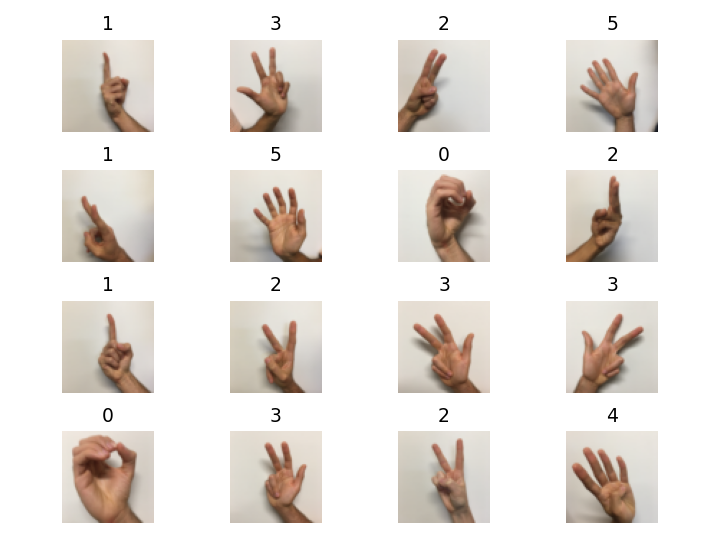

In [30]:
plt.figure()

predicted = clf.predict(X_test_scaled)

display_samples_in_grid(X_test, n_rows=4, y= predicted)

## Compare with SVM

In [31]:
from sklearn.svm import SVC

In [32]:
clf = SVC(C=10, kernel='rbf', gamma=0.0001).fit(X_train_scaled, y_train)
print("train accuracy= {:.3%}".format(clf.score (X_train_scaled, y_train)))
print("test accuracy= {:.3%}".format(clf.score (X_test_scaled, y_test)))

train accuracy= 100.000%
test accuracy= 95.000%
